In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir("../input"))

['stanford-dogs-dataset', 'dataset-for-vit']


In [2]:
from numpy import argmax
from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os
from keras import layers
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from keras.models import Model, load_model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
import scipy.misc
from matplotlib.pyplot import imshow
%matplotlib inline
from numpy import argmax
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils.np_utils import to_categorical

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import time

import keras.backend as K
K.set_image_data_format('channels_last')
K.set_learning_phase(1)

Using TensorFlow backend.


In [3]:
def label_assignment(img,label):
    return label

In [4]:
from tqdm import tqdm
def training_data(label,data_dir):
    for img in tqdm(os.listdir(data_dir)):
        label = label_assignment(img,label)
        path = os.path.join(data_dir,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img,(imgsize,imgsize))
        X.append(np.array(img))
        Z.append(str(label))

In [5]:
X = []
Z = []
imgsize = 300
directory="/kaggle/input/dataset-for-vit/dataset for vit"

In [6]:
diseased=directory+'/1'
black_rot = directory+'/2'
r_spot = directory+'/3'
healthy = directory+'/4'

training_data("diseased",diseased)
training_data('black_rot',black_rot)
training_data('r_spot',r_spot)
training_data('healthy',healthy)

100%|██████████| 755/755 [00:05<00:00, 146.60it/s]


In [7]:
X = np.array(X)
Z = np.array(Z)
n = np.arange(X.shape[0])
np.random.shuffle(n)
X=X[n]
Z=Z[n]
X = X.astype(np.float32)
X=X/255
le= LabelEncoder()
Y = le.fit_transform(Z)
Y = to_categorical(Y,10)
X = np.array(X)
X=X/255
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=69)

In [8]:
print("Train X shape:{} and Train Y shape: {}".format(x_train.shape,y_train.shape))

Train X shape:(1831, 300, 300, 3) and Train Y shape: (1831, 10)


In [9]:
################################MODEL##############################

from keras.applications.resnet50 import ResNet50
base_model = ResNet50(include_top=False,
                  input_shape = (imgsize,imgsize,3),
                  weights = 'imagenet')


Instructions for updating:
Colocations handled automatically by placer.


/opt/conda/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 2s 0us/step


In [10]:
from keras.models import Sequential,Input,Model
from keras.layers import Dense,Flatten,Dropout,Concatenate,GlobalAveragePooling2D,Lambda,ZeroPadding2D
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 10, 10, 2048)      23587712  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                20490     
Total params: 23,608,202
Trainable params: 23,555,082
Non-trainable params: 53,120
_________________________________________________________________


In [14]:
history = model.fit(x_train,y_train,batch_size=50, epochs=30, verbose=1)

Epoch 1/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.3749 - acc: 0.8613
Epoch 2/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.2225 - acc: 0.9170
Epoch 3/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.1022 - acc: 0.9656
Epoch 4/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.0793 - acc: 0.9694
Epoch 5/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.0797 - acc: 0.9738
Epoch 6/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.0907 - acc: 0.9694
Epoch 7/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.0906 - acc: 0.9721
Epoch 8/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.0527 - acc: 0.9831
Epoch 9/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.0177 - acc: 0.9967
Epoch 10/30
1831/1831 [==============================] - 22s 12ms/step - loss: 0.0145 - acc: 0.9967
Epoch 11/

In [15]:
history.history

{'loss': [0.37491312129845195,
  0.22247814538454763,
  0.10222729526618866,
  0.07933379029056566,
  0.0797495566835451,
  0.09068623746291071,
  0.09060591353273405,
  0.052655819487609966,
  0.01770198854270881,
  0.014486654624496782,
  0.01709022468849503,
  0.029894769371355972,
  0.069671838148141,
  0.06835764701972075,
  0.0472248146236187,
  0.03416951683287345,
  0.027227728687768984,
  0.029332749652261743,
  0.034431126604369394,
  0.03160532310710338,
  0.038058219292961014,
  0.041669352662146594,
  0.021271356606168305,
  0.015250385835106068,
  0.0019383277067847719,
  0.0007273206776317646,
  0.00045651965468020025,
  0.00039387998339685866,
  0.00025424248733935616,
  0.025483552120329538],
 'acc': [0.86127798232402,
  0.9169852533736299,
  0.9655925742529052,
  0.9694156236234485,
  0.9737848156075345,
  0.9694156219957957,
  0.9721463708718705,
  0.9830693608747031,
  0.9967231052550769,
  0.9967231036274242,
  0.9967231036274242,
  0.9918077588732421,
  0.97487711

In [16]:
preds = model.evaluate(x_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

786/786 [==============================] - 6s 8ms/step
Loss = 0.5741894947360187
Test Accuracy = 0.8664122132854607


In [17]:
from sklearn.metrics import confusion_matrix

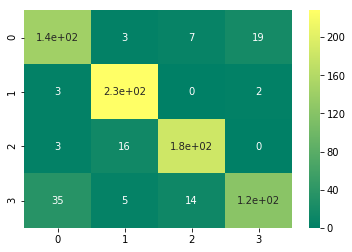

In [18]:
y_pred = model.predict(x_test)
y_predi=np.argmax(y_pred, axis=1)
y_testi=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_testi , y_predi)

import seaborn as sns
sns.heatmap(cm , cmap="summer" , annot=True)

In [21]:
def measure_prediction_time(model, image_path):
    # Load and preprocess the image
    img = load_img(image_path, target_size=(300, 300))  # Adjust size based on base_model input
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    
    # Perform multiple runs to get a more accurate average
    num_runs = 10
    times = []
    
    for _ in range(num_runs):
        # Measure prediction time
        start_time = time.time()
        prediction = model.predict(img_array)
        end_time = time.time()
        
        # Calculate and store prediction time
        times.append(end_time - start_time)
    
    # Calculate statistics
    avg_time = np.mean(times)
    std_time = np.std(times)
    
    print(f"Average Prediction Time: {avg_time:.4f} seconds")
    print(f"Standard Deviation: {std_time:.4f} seconds")
    
    return prediction

In [22]:
prediction = measure_prediction_time(model, '/kaggle/input/dataset-for-vit/dataset for vit/2/Cf_blk_rot(10).jpg')

Average Prediction Time: 0.0132 seconds
Standard Deviation: 0.0005 seconds
